In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib.animation import FuncAnimation

In [4]:
def solve_advect(tau,I,L,c,tMax,f0,method='ftcs'):
    '''Function to solve the advection equation'''
    h=L/I
    coeff=c*tau/(2.0*h)
    
    # Initialize a
    xlin=np.linspace(0,L,I)
    a=np.zeros((tMax,I))
    a[0,:]=f0(xlin)
    
    # Get grids, helpful for plotting
    tlin=np.linspace(0,tMax,tMax)
    x,t=np.meshgrid(xlin,tlin)        


    # Propagate advection equation
    for n in range(tMax-1):
        
        if method=='ftcs':
            a[n+1,1:I-1] = a[n,1:I-1]-coeff*(a[n,2:I]-a[n,0:I-2])
            # Apply periodic boundary conditions
            a[n+1,0] = a[n,0]-coeff*(a[n,1]-a[n,-1])
            a[n+1,I-1] = a[n,I-1]-coeff*(a[n,0]-a[n,I-2])
        
        elif method=='lax':
            a[n+1,1:I-1] = 0.5*(a[n,2:I]+a[n,0:I-2])-coeff*(a[n,2:I]-a[n,0:I-2])
            a[n+1,0] = 0.5*(a[n,1]+a[n,-1])-coeff*(a[n,1]-a[n,-1])
            a[n+1,I-1] = 0.5*(a[n,0]+a[n,I-2])-coeff*(a[n,0]-a[n,I-2])
            
        elif method=='lax_wendroff':
            a[n+1,1:I-1] = a[n,1:I-1]-coeff*(a[n,2:I]-a[n,0:I-2]) \
                            +2.*coeff**2*(a[n,2:I]+a[n,0:I-2]-2.*a[n,1:I-1])
            
            a[n+1,0] = a[n,0]-coeff*(a[n,1]-a[n,-1]) \
                            +2.*coeff**2*(a[n,1]+a[n,-1]-2.*a[n,0])
            
            
            a[n+1,I-1] = a[n,I-1]-coeff*(a[n,0]-a[n,I-2]) \
                            +2.*coeff**2*(a[n,0]+a[n,I-2]-2.*a[n,I-1])

            
    return xlin,tlin,x,t,a

def cos_wave_packet(x):
    '''Function for wavepacket'''
    sigma=0.1
    k=np.pi/sigma
    x0=0.5
    return np.cos(k*(x-x0))*np.exp(-(x-x0)**2/(2*sigma)**2)

In [2]:
# Parameters for advection equation and calculation
tau=0.001
I=50
L=1.
c=1.
tMax=int(np.ceil(L/(c*tau)))+1 # One period so should come back to itself

# Solve using the FTCS method
xlin,tlin,x,t,a=solve_advect(tau,I,L,c,tMax,cos_wave_packet,method='ftcs')

# Make an animated plot
fig1,ax1=plt.subplots(figsize=(10,5))
line,=ax1.plot(xlin,a[0,:])
ax1.set_ylim(-1.5,1.5)

def animate(i):
    ax1.clear()
    ax1.set_ylim(-1.5,1.5)
    ax1.plot(xlin,a[i*10,:])
    ax1.plot(xlin,a[0,:],'r:')
    return line,

anim = FuncAnimation(fig1, animate, frames=int(tMax/10), interval=1,repeat=False,blit=True)

# Save as gif, can open in browser
anim.save('ftcs.gif',writer='imagemagick',fps=5)

plt.show()

NameError: name 'solve_advect' is not defined

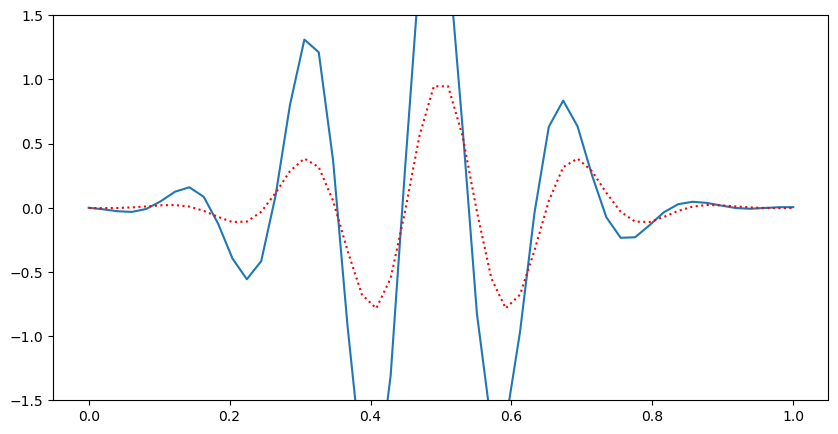

In [9]:
# Parameters for advection equation and calculation
tau=0.021
I=50
L=1.
c=1.
tMax=int(np.ceil(L/(c*tau)))+1

# Solve using the Lax method
xlin,tlin,x,t,a=solve_advect(tau,I,L,c,tMax,cos_wave_packet,method='lax')

# Make an animated plot
fig1,ax1=plt.subplots(figsize=(10,5))
line,=ax1.plot(xlin,a[0,:])
ax1.set_ylim(-1.5,1.5)

def animate(i):
    ax1.clear()
    ax1.set_ylim(-1.5,1.5)
    ax1.plot(xlin,a[i,:])
    ax1.plot(xlin,a[0,:],'r:')
    return line,

anim = FuncAnimation(fig1, animate, frames=tMax, interval=1,repeat=False,blit=True)

# Save as gif, can open in browser
anim.save('lax.gif',writer='imagemagick',fps=5)

plt.show()

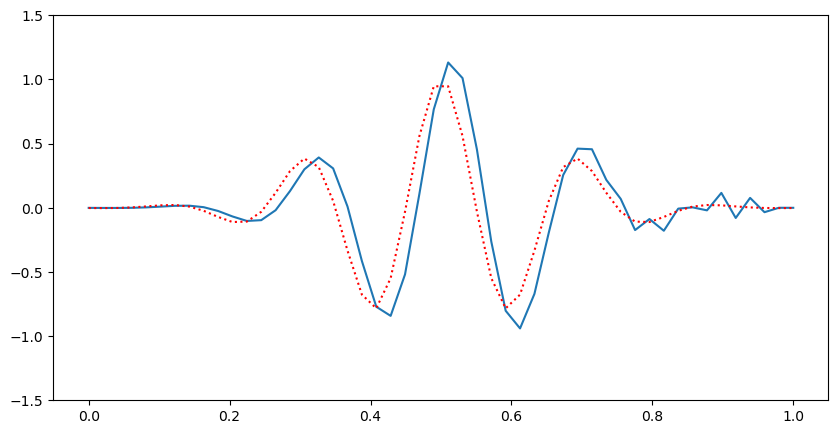

In [8]:
# Parameters for advection equation and calculation
tau=0.021
I=50
L=1.
c=1.
tMax=int(np.ceil(L/(c*tau)))+1

# Solve using the Lax method
xlin,tlin,x,t,a=solve_advect(tau,I,L,c,tMax,cos_wave_packet,method='lax_wendroff')

# Make an animated plot
fig1,ax1=plt.subplots(figsize=(10,5))
line,=ax1.plot(xlin,a[0,:])
ax1.set_ylim(-1.5,1.5)

def animate(i):
    ax1.clear()
    ax1.set_ylim(-1.5,1.5)
    ax1.plot(xlin,a[i,:])
    ax1.plot(xlin,a[0,:],'r:')
    return line,

anim = FuncAnimation(fig1, animate, frames=tMax, interval=1,repeat=False,blit=True)

# Save as gif, can open in browser
anim.save('lax_wendroff.gif',writer='imagemagick',fps=5)

plt.show()